# K近邻算法(K-Nearest-Neighbor)

### KNN算法步骤

* 计算测试数据距离每个样本点的距离。

* 将计算得到的距离进行排序。

* 选出距离较近的K个样本，并对其类别进行分类。

* 距离测试数据距离最近的样本的类别就是测试数据所属的类别。

### 约会网站的配对效果

##### 项目概述

* 海伦使用约会网站寻找约会对象，经过一段时间发现，曾经交往过三种类型的人：
  * 1.不喜欢的人
  * 2.魅力一般的人
  * 3.极具魅力的人
* 她希望：
  * 1.工作日与魅力一般的人约会
  * 2.周末与极具魅力的人约会
  * 3.不喜欢的人直接排除

### 收集数据

* 数据集在datingTestSet2.txt中
* 前3个属性分别是：玩游戏所耗时间比，飞行里程数，消费冰淇淋数。

### 准备数据：使用 Python 解析文本文件

In [253]:
#导入包
import numpy as np
import operator#运算符模块
from os import listdir
from collections import Counter

In [254]:
#将文本记录转换为numpy的解析程序
def file2matrix(filename):
    fr = open(filename)
    numberlines = len(fr.readlines())#获取行数
    returnMat = np.zeros((numberlines,3))#空矩阵
    classlabel = []#label
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()#移除头尾的字符
        listFromline = line.split('\t')#以'\t'切分
        returnMat[index,:] = listFromline[0:3]#获取每行的数据保存在returnMat中
        classlabel.append(int(listFromline[-1]))#将每行的标签保存在classlabel中
        index+=1
    return returnMat,classlabel#返回每个样本的属性和标签

### 分析数据：使用 Matplotlib 画二维散点图

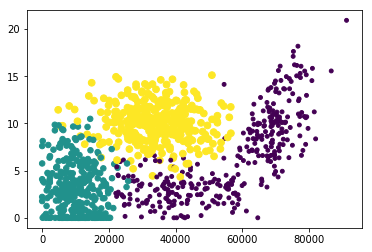

In [255]:
import matplotlib.pyplot as plt
import matplotlib

datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
fig = plt.figure()#创建一个窗口
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

* 这是三维空间图，将其投影到X轴就会得到上面的二维图。

D:\Anaconda\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
D:\Anaconda\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


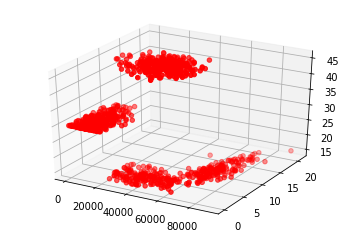

In [256]:
from mpl_toolkits.mplot3d import Axes3D#导入包

datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
ax = plt.subplot(111,projection='3d')#创建一个三维的绘图工程
x1 = datingDataMat[:,0]
x2 = datingDataMat[:,1]
x3 = datingDataMat[:,2]
ax.scatter(x1,x2,15.0*np.array(datingLabels), 15.0*np.array(datingLabels),c='r')
plt.show()

* 归一化数据，目的是使数据的大小在0-1的范围内。

In [257]:
#数据归一化
#公式：y = (X - Xmin) / (Xmax - Xmin)
def autoNorm(dataSet):
    #计算最大值和最小值
    minval = dataSet.min(0)
    maxval = dataSet.max(0)
    n = dataSet.shape
    normDataSet = np.zeros(n)
    m = dataSet.shape[0]
    ranges = maxval - minval
    #每个属性与最小值之差的矩阵
    normDataSet = dataSet - np.tile(minval,(m,1))
    #最小值之差除以最大值减最小值
    normDataSet = normDataSet / np.tile(ranges,(m,1))
    return normDataSet, ranges, minval

### 分类

In [258]:
#计算距离
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #距离度量 度量公式为欧氏距离
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    
    #将距离排序：从小到大
    sortedDistIndicies = distances.argsort()
    #选取前K个最短距离， 选取这K个中最多的分类类别
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [259]:
#约会网站的测试
def datingClassTest():
    """
    Desc:
        对约会网站的测试方法
    parameters:
        none
    return:
        错误数
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')  # load data setfrom file
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print ('numTestVecs=', numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        # 对数据测试
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 6)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
            print('error classify')
    print ("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print (errorCount)

### 使用KNN进行预测

In [260]:
def classifyPerson():
    resultList = ['不喜欢','魅力一般','极具魅力']#标签
    #输入3个属性值
    game = float(input('play games?'))
    fly = float(input('fly distance?'))
    icecream = float(input('ice cream?'))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges, minval = autoNorm(datingDataMat)
    inArr = np.array([game,fly,icecream])
    classifierResult = classify0((inArr - minval) / ranges,normMat,datingLabels,3)
    print('You will probably like:',resultList[classifierResult - 1])

In [261]:
# if __name__ == '__main__':
#     classifyPerson()

In [262]:
datingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 